In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('rock_density_xray.csv')

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


<Axes: xlabel='Rebound Signal Strength nHz', ylabel='Rock Density kg/m3'>

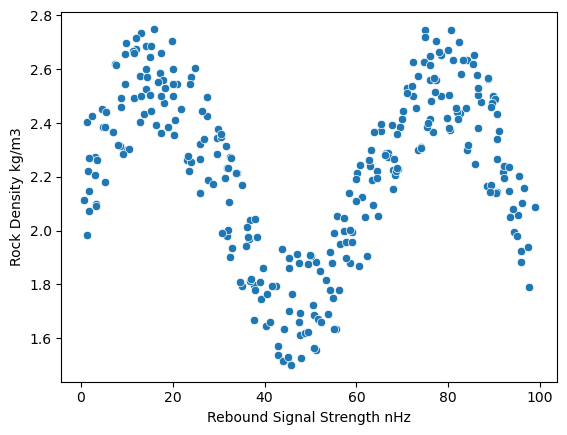

In [4]:
sns.scatterplot(x="Rebound Signal Strength nHz",y="Rock Density kg/m3", data = df)

In [5]:
df.columns = ['signal','density']

In [13]:
X=df['signal'].values.reshape(-1,1)
y = df['density']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr_model = LinearRegression()

In [19]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [21]:
lr_preds = lr_model.predict(X_test)

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [23]:
mean_absolute_error(y_test,lr_preds)

0.211198973318633

In [26]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.2570051996584629

In [25]:
df['density'].mean()

2.225062949323796

In [29]:
def run_model(model,X_train,y_train,X_test,y_test):

    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    mae = mean_absolute_error(y_test,preds)
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    signal_range = np.arange(0,100)
    signal_preds = model.predict(signal_range.reshape(-1,1))
    sns.scatterplot(x="signal",y="density", data = df,color = 'black')
    plt.plot(signal_range,signal_preds)
    
    



MAE: 0.211198973318633
RMSE: 0.2570051996584629


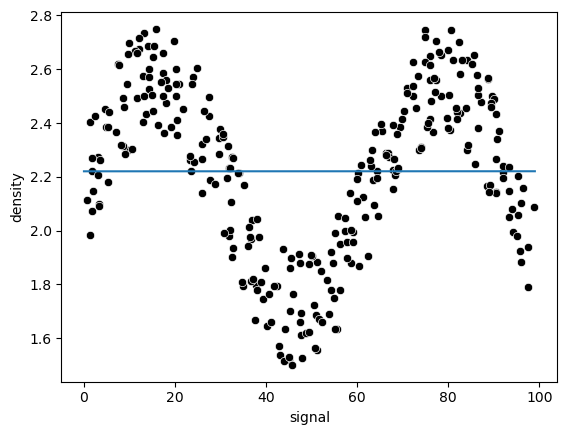

In [30]:
model = LinearRegression()
run_model(model,X_train,y_train,X_test,y_test)

In [31]:
from sklearn.pipeline import make_pipeline

In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:
pipe = make_pipeline(PolynomialFeatures(degree = 2), LinearRegression())

MAE: 0.2290310544351129
RMSE: 0.28173095637255835


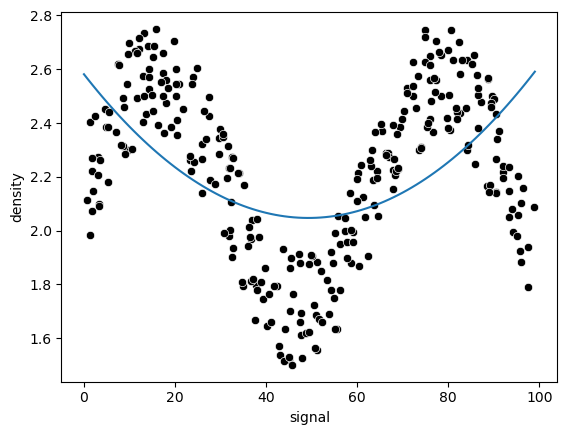

In [35]:
 run_model(pipe,X_train,y_train,X_test,y_test)

In [37]:
from sklearn.neighbors import KNeighborsRegressor

MAE: 0.11877297474442378
RMSE: 0.1523487028635337
MAE: 0.12198383614100558
RMSE: 0.13730685016923647
MAE: 0.11635971693292672
RMSE: 0.13277855732740926


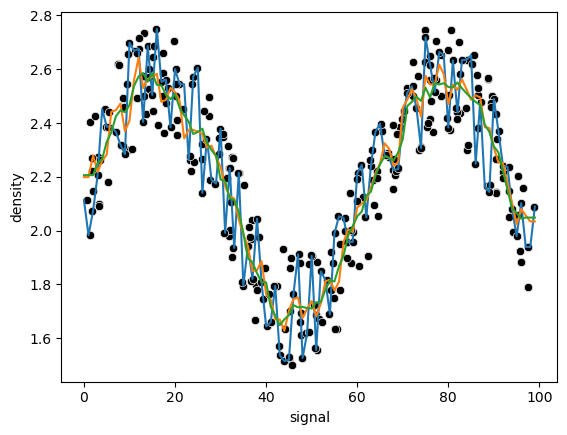

In [39]:
k_values = [1,5,10]
for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    
    run_model(model,X_train,y_train,X_test,y_test)

In [40]:
from sklearn.tree import DecisionTreeRegressor

MAE: 0.11877297474442378
RMSE: 0.1523487028635337


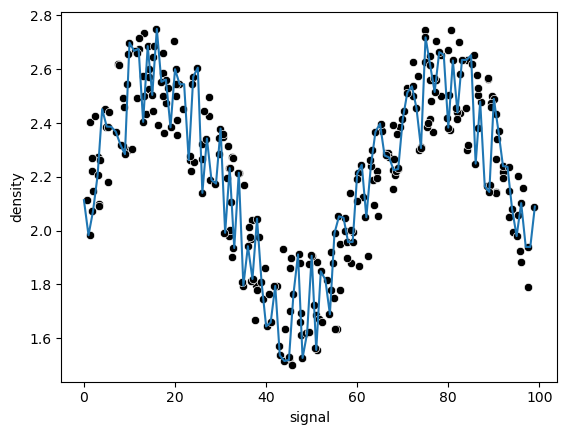

In [42]:
model = DecisionTreeRegressor()
run_model(model,X_train,y_train,X_test,y_test)

In [43]:
from sklearn.svm import SVR

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
svr = SVR()
param_grid  = {'C':[0.01,0.1,1,5,10,100,100],'gamma':['auto','scale']}

grid = GridSearchCV(svr,param_grid)

MAE: 0.11243103141068958
RMSE: 0.13015742723601528


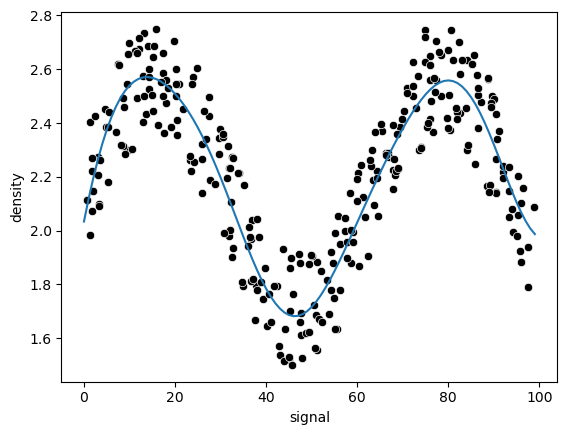

In [46]:
run_model(grid,X_train,y_train,X_test,y_test)

In [47]:
rfr = RandomForestRegressor(n_estimators=10)


MAE: 0.10394293524321015
RMSE: 0.13082091971837118


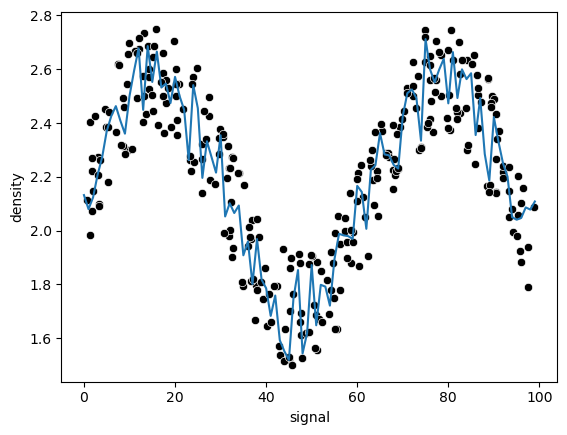

In [48]:
run_model(rfr,X_train,y_train,X_test,y_test)

In [49]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor

MAE: 0.11318284854800689
RMSE: 0.13294148649584667


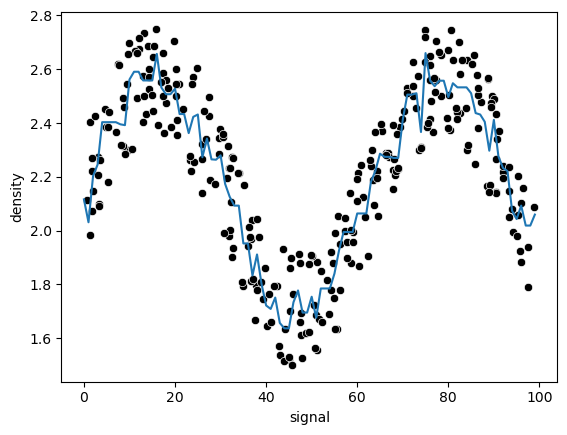

In [51]:
model = GradientBoostingRegressor()
run_model(model,X_train,y_train,X_test,y_test)

MAE: 0.11551821364847024
RMSE: 0.13602264641204695


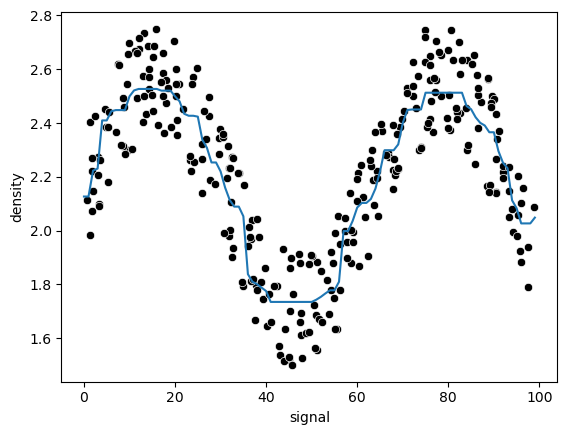

In [52]:
model = AdaBoostRegressor()
run_model(model,X_train,y_train,X_test,y_test)